# Achievement 6.4 Supervised Machine Learning w/ Linear Regression

## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\ASUS\World Happiness Report 04.2024'

In [5]:
df_World = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_World_62.pkl'))

### 2. Data cleaning : This part has been done in the previous exercise

### 3. Data prep for regression analysis 

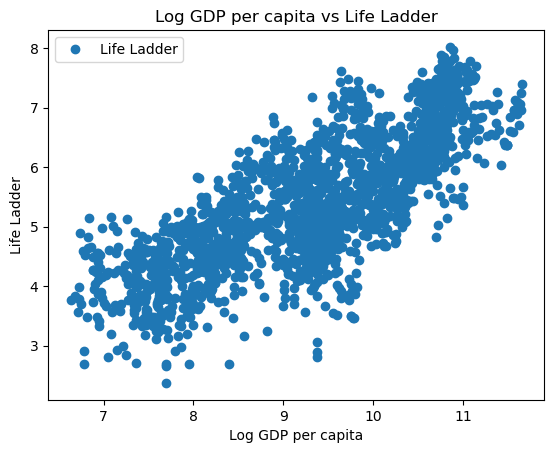

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_World.plot(x = 'Log GDP per capita', y='Life Ladder',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Log GDP per capita vs Life Ladder')  
plt.xlabel('Log GDP per capita')  
plt.ylabel('Life Ladder')  
plt.show()

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_World['Log GDP per capita'].values.reshape(-1,1)
y = df_World['Life Ladder'].values.reshape(-1,1)

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [11]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

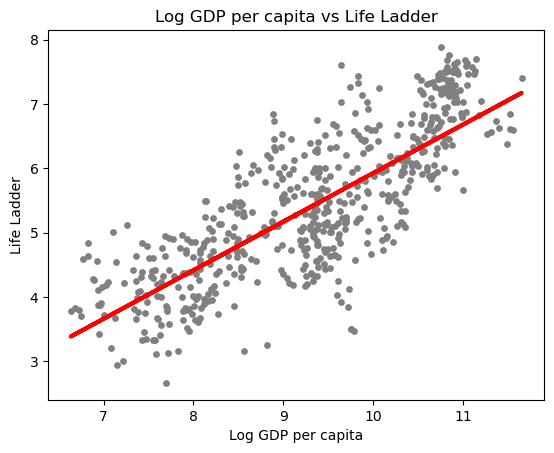

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Log GDP per capita vs Life Ladder')
plot_test.xlabel('Log GDP per capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

In [15]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.75609873]]
Mean squared error:  0.47856693065231426
R2 score:  0.6411653389887787


#### Comment :

The provided regression model results can be interpreted as follows:

Slope: [[0.75609873]]
The slope (regression coefficient 
𝐵
1
B 
1
​
 ) indicates the strength and direction of the relationship between the independent variable (
𝑥
x) and the dependent variable (
𝑦
y). A slope of 0.75609873 suggests that for every one unit increase in the independent variable, the dependent variable is expected to increase by approximately 0.756 units. This positive value indicates a direct relationship between the variables.

Mean Squared Error (MSE): 0.47856693065231426
The Mean Squared Error measures the average of the squares of the errors, which are the differences between the observed and predicted values. An MSE of 0.47856693065231426 indicates that, on average, the predictions of the model deviate from the actual values by this amount squared. Lower MSE values represent a better fit of the model to the data.

R^2 Score: 0.6411653389887787
The R^2 score, or coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. An R^2 score of 0.6411653389887787 means that approximately 64.12% of the variance in the dependent variable is explained by the model. This suggests a moderately strong relationship between the independent and dependent variables.

Summary
The regression model shows a positive relationship between the independent and dependent variables, with a moderately strong explanatory power (R^2 score). The mean squared error is reasonably low, indicating that the model's predictions are relatively close to the actual values. Overall, the model appears to perform well in explaining the variation in the dependent variable based on the given independent variable. However, there is still room for improvement, as around 35.88% of the variance is not explained by the model.








In [17]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.814,5.457254
1,3.447,3.998739
2,6.090,6.087084
3,5.834,5.160107
4,6.599,5.944938
5,5.463,5.683327
6,3.561,4.146179
7,5.332,6.161938
8,6.345,6.530914
9,6.276,6.356255


#### Comment :
The dataframe provides a clear comparison between the actual and predicted values of 
𝑦
y. Here are a few observations:

Close Predictions: For many instances, the predicted values are quite close to the actual values. For example, the actual value of 6.090 and its predicted value of 6.087084 show a very close match.

Differences: In some cases, there are noticeable differences between actual and predicted values. For instance, the actual value of 4.814 is predicted as 5.457254, which indicates a significant prediction error.

Overall Trend: Despite some differences, the predictions seem to follow the general trend of the actual values, indicating that the model has captured the underlying pattern to a reasonable extent.

### 4 Compare how the regression fits the training set

In [18]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.75609873]]
Mean squared error:  0.48083611566734075
R2 score:  0.601212113569515


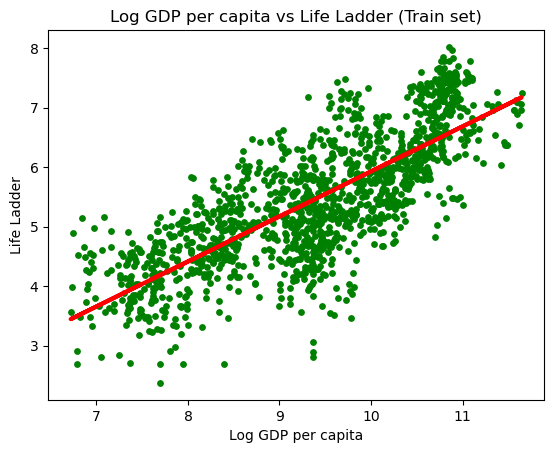

In [21]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Log GDP per capita vs Life Ladder (Train set)')
plot_test.xlabel('Log GDP per capita')
plot_test.ylabel('Life Ladder')
plot_test.show()




### 5. Export dataset 

In [ ]:
# Export data to pkl

df_World.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_World_62.pkl'))